In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import plotly.express as px
import plotly.graph_objects as go
import os
from datetime import datetime
from plotly.subplots import make_subplots



In [85]:
compstak_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\compstak_mapped.csv')
doe_df = pd.read_csv(r'C:\Users\clint\Desktop\compstak-analysis\Data\DOE_mapped.csv')

In [86]:
compstak_df

,Property Type,Property Subtype,Property Id,State,DOE_Compliant_Property_Type
0,Retail,Parking,1,NY,Other
1,Retail,Apartments,2,NY,Multi-Family
2,Office,NaN,3,NY,Office
3,Retail,NaN,4,NY,Retail
4,Office,Mixed-Use,5,NY,Other
...,...,...,...,...,...
759618,NaN,NaN,3611385,NY,Other
759619,Industrial,Flex/R&D,3611389,FL,Industrial
759620,Industrial,Flex/R&D,3611390,FL,Industrial
759621,NaN,NaN,3611391,CA,Other


In [87]:
doe_df

,statecode,reported_propertytype,reported_propertysubtype,compstak_equivalent_category
0,CT,Flex,Light Manufacturing,Industrial
1,CT,Industrial,Warehouse,Industrial
2,CT,Industrial,NaN,Industrial
3,CT,Multi-Family,Apartments,Multi-Family
4,CT,Multi-Family,Apartments,Multi-Family
...,...,...,...,...
2246480,WI,Retail,Storefront Retail/Office,Retail
2246481,WI,Retail,Storefront Retail/Office,Retail
2246482,WI,Retail,NaN,Retail
2246483,WI,Retail,NaN,Retail


# Comparison of Property Type Categories Between DOE and CompStak Datasets

This analysis compares:
- DOE dataset's `compstak_equivalent_category` field
- CompStak dataset's `DOE_Compliant_Property_Type` field

We'll analyze the value counts and visualize the distributions for each.

In [88]:
# Get value counts for each dataset's category field
doe_category_counts = doe_df['compstak_equivalent_category'].value_counts().reset_index()
compstak_category_counts = compstak_df['DOE_Compliant_Property_Type'].value_counts().reset_index()

# Rename columns for clarity
doe_category_counts.columns = ['Category', 'DOE Count']
compstak_category_counts.columns = ['Category', 'CompStak Count']

# Display the counts for each dataset
print("DOE Dataset - 'compstak_equivalent_category' Counts:")
display(doe_category_counts)

print("\nCompStak Dataset - 'DOE_Compliant_Property_Type' Counts:")
display(compstak_category_counts)

DOE Dataset - 'compstak_equivalent_category' Counts:


,Category,DOE Count
0,Retail,931077
1,Industrial,438534
2,Office,388432
3,Multi-Family,253361
4,Other,161804
5,Hotel,73277



CompStak Dataset - 'DOE_Compliant_Property_Type' Counts:


,Category,CompStak Count
0,Retail,195522
1,Industrial,183106
2,Other,167732
3,Multi-Family,114427
4,Office,88768
5,Hotel,10068


In [89]:
# Merge the two dataframes to compare side by side
comparison_df = pd.merge(doe_category_counts, compstak_category_counts, on='Category', how='outer').fillna(0)

# Calculate percentage of total for each dataset
comparison_df['DOE Percentage'] = (comparison_df['DOE Count'] / comparison_df['DOE Count'].sum() * 100).round(2)
comparison_df['CompStak Percentage'] = (comparison_df['CompStak Count'] / comparison_df['CompStak Count'].sum() * 100).round(2)

# Sort by total count (sum of both datasets)
comparison_df['Total'] = comparison_df['DOE Count'] + comparison_df['CompStak Count']
comparison_df = comparison_df.sort_values('Total', ascending=False).reset_index(drop=True)

# Display the comparison dataframe
comparison_df

,Category,DOE Count,CompStak Count,DOE Percentage,CompStak Percentage,Total
0,Retail,931077,195522,41.45,25.74,1126599
1,Industrial,438534,183106,19.52,24.10,621640
2,Office,388432,88768,17.29,11.69,477200
3,Multi-Family,253361,114427,11.28,15.06,367788
4,Other,161804,167732,7.20,22.08,329536
5,Hotel,73277,10068,3.26,1.33,83345


<Figure size 1400x800 with 0 Axes>

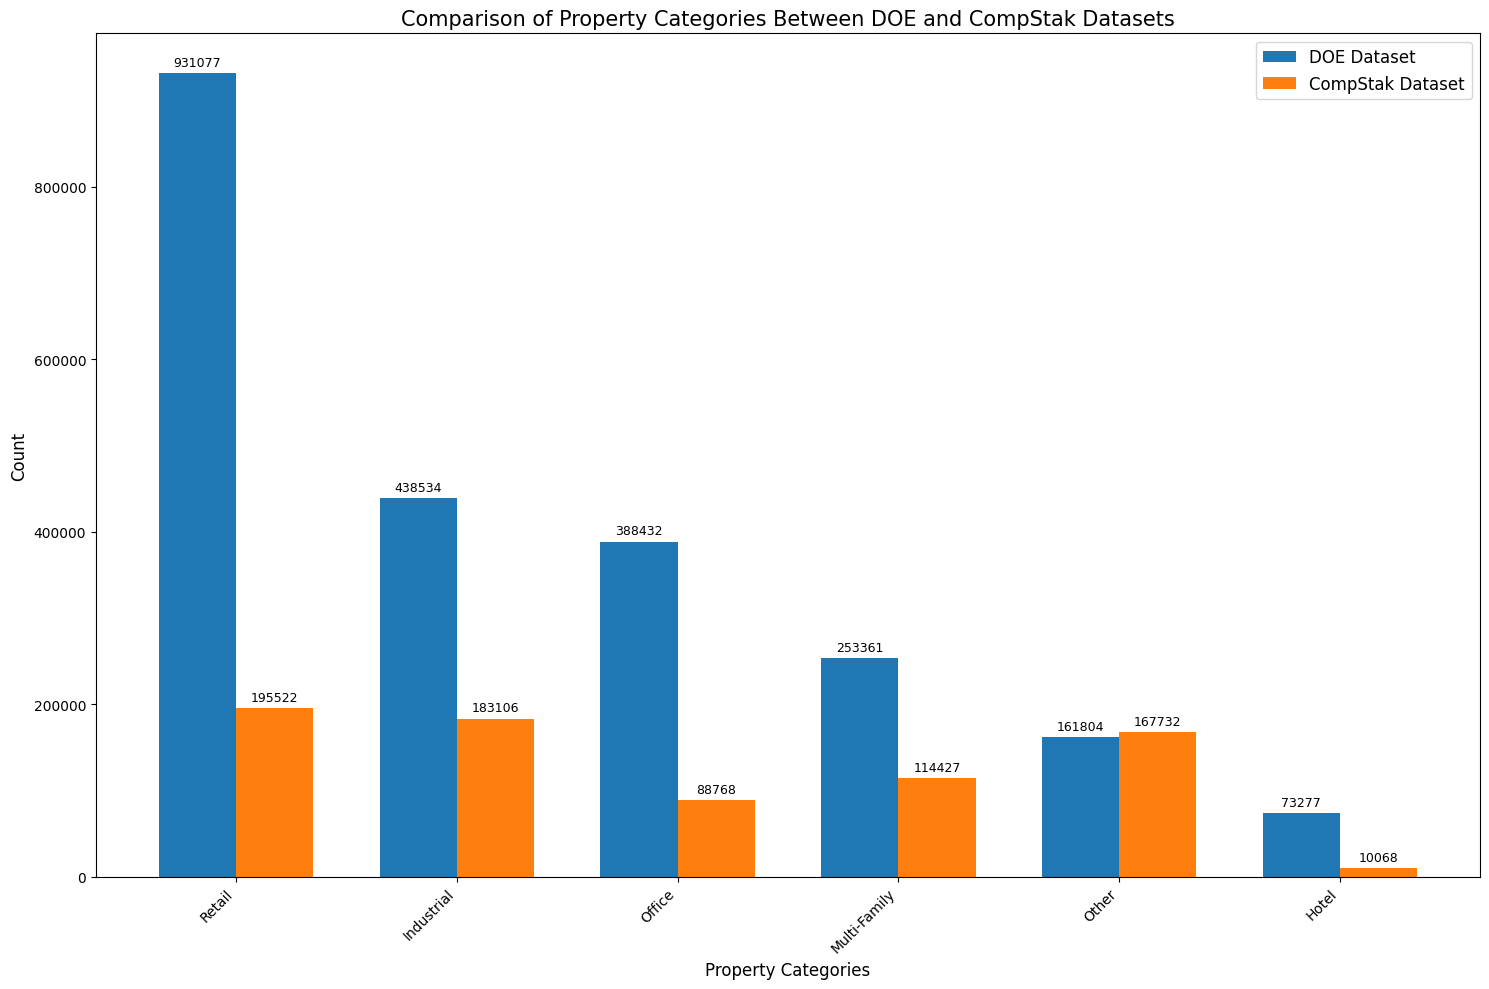

In [90]:
# Create bar chart to visualize the comparison
plt.figure(figsize=(14, 8))

# Get categories that exist in at least one dataset
categories = comparison_df['Category']

# Set up the bar positions
x = np.arange(len(categories))
width = 0.35

# Create bars
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, comparison_df['DOE Count'], width, label='DOE Dataset')
rects2 = ax.bar(x + width/2, comparison_df['CompStak Count'], width, label='CompStak Dataset')

# Add labels and title
ax.set_xlabel('Property Categories', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Comparison of Property Categories Between DOE and CompStak Datasets', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)

# Add value labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:  # Only add labels to visible bars
            ax.annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=9)

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

In [91]:
# Create an interactive plotly bar chart for better visualization
fig = go.Figure()

# Add bars for each dataset
fig.add_trace(go.Bar(
    x=comparison_df['Category'],
    y=comparison_df['DOE Count'],
    name='DOE Dataset',
    text=comparison_df['DOE Count'].apply(lambda x: f'{int(x)}'),
    textposition='auto',
))

fig.add_trace(go.Bar(
    x=comparison_df['Category'],
    y=comparison_df['CompStak Count'],
    name='CompStak Dataset',
    text=comparison_df['CompStak Count'].apply(lambda x: f'{int(x)}'),
    textposition='auto',
))

# Customize layout
fig.update_layout(
    title='Comparison of Property Categories Between DOE and CompStak Datasets',
    xaxis_title='Property Categories',
    yaxis_title='Count',
    barmode='group',
    height=600,
    width=1000,
    legend=dict(x=0.01, y=0.99),
    margin=dict(l=50, r=50, b=100, t=100)
)

# Show the interactive plot
fig.show()

In [92]:
# Create percentage stacked bar chart to show proportion differences
percentage_df = comparison_df[['Category', 'DOE Percentage', 'CompStak Percentage']]

# Reshape data for plotting
percentage_df_melted = pd.melt(percentage_df, 
                             id_vars=['Category'], 
                             value_vars=['DOE Percentage', 'CompStak Percentage'], 
                             var_name='Dataset', 
                             value_name='Percentage')

# Create the stacked bar chart
fig = px.bar(percentage_df_melted, 
            x='Dataset', 
            y='Percentage', 
            color='Category', 
            barmode='relative',
            title='Percentage Distribution of Property Categories in Each Dataset',
            labels={'Percentage': 'Percentage of Dataset (%)', 'Dataset': ''},
            height=600)

# Customize layout
fig.update_layout(
    legend_title='Property Category',
    font=dict(size=12),
)

# Save the figure to disk with timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = r'C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'property_category_comparison_{timestamp}.html')
fig.write_html(output_path)

print(f'Interactive visualization saved to: {output_path}')

# Show the figure
fig.show()

Interactive visualization saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\property_category_comparison_20250430_183907.html


## Side-by-Side Percentage Comparison

Let's create a more effective visualization to directly compare the percentage distributions between the DOE and CompStak datasets.

In [93]:
# Create a horizontal bar chart comparing percentages side by side
# Sort categories by the total percentage (sum of both datasets)
comparison_df['Combined Percentage'] = comparison_df['DOE Percentage'] + comparison_df['CompStak Percentage']
sorted_df = comparison_df.sort_values('Combined Percentage', ascending=False).reset_index(drop=True)

# Create a horizontal bar chart using plotly
fig = go.Figure()

# Add traces for DOE percentages
fig.add_trace(go.Bar(
    y=sorted_df['Category'],
    x=sorted_df['DOE Percentage'],
    name='DOE Dataset',
    orientation='h',
    text=sorted_df['DOE Percentage'].apply(lambda x: f'{x:.1f}%'),
    textposition='auto',
    marker_color='royalblue',
    hovertemplate='%{y}: %{x:.2f}%<extra>DOE Dataset</extra>'
))

# Add traces for CompStak percentages
fig.add_trace(go.Bar(
    y=sorted_df['Category'],
    x=sorted_df['CompStak Percentage'],
    name='CompStak Dataset',
    orientation='h',
    text=sorted_df['CompStak Percentage'].apply(lambda x: f'{x:.1f}%'),
    textposition='auto',
    marker_color='firebrick',
    hovertemplate='%{y}: %{x:.2f}%<extra>CompStak Dataset</extra>'
))

# Update layout
fig.update_layout(
    title={
        'text': 'Percentage Distribution Comparison: DOE vs CompStak',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Percentage (%)',
    barmode='group',
    height=600,
    width=900,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    margin=dict(l=20, r=20, t=60, b=20)
)

# Save the figure
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = r'C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'property_percentage_comparison_{timestamp}.html')
fig.write_html(output_path)
output_path_png = os.path.join(output_dir, f'property_percentage_comparison_{timestamp}.png')
fig.write_image(output_path_png)

print(f'Interactive visualization saved to: {output_path}')
print(f'Static image saved to: {output_path_png}')

# Show the figure
fig.show()

Interactive visualization saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\property_percentage_comparison_20250430_183907.html
Static image saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\property_percentage_comparison_20250430_183907.png


## Side-by-Side Pie Chart Comparison

Let's create side-by-side pie charts to directly compare the percentage distributions between the DOE and CompStak datasets.

In [94]:
# Create side-by-side pie charts for DOE and CompStak property type distributions

# Group smaller categories into 'Other' to make the charts more readable
threshold = 3.0  # Categories with less than 3% will be grouped as 'Other'

# Process DOE dataset categories
doe_pie_data = comparison_df[['Category', 'DOE Percentage']].copy()
other_mask_doe = doe_pie_data['DOE Percentage'] < threshold
other_sum_doe = doe_pie_data.loc[other_mask_doe, 'DOE Percentage'].sum()
doe_pie_data = doe_pie_data[~other_mask_doe].copy()
doe_pie_data = pd.concat([doe_pie_data, pd.DataFrame({'Category': ['Other'], 'DOE Percentage': [other_sum_doe]})]) if other_sum_doe > 0 else doe_pie_data
doe_pie_data = doe_pie_data.sort_values('DOE Percentage', ascending=False).reset_index(drop=True)

# Process CompStak dataset categories
compstak_pie_data = comparison_df[['Category', 'CompStak Percentage']].copy()
other_mask_compstak = compstak_pie_data['CompStak Percentage'] < threshold
other_sum_compstak = compstak_pie_data.loc[other_mask_compstak, 'CompStak Percentage'].sum()
compstak_pie_data = compstak_pie_data[~other_mask_compstak].copy()
compstak_pie_data = pd.concat([compstak_pie_data, pd.DataFrame({'Category': ['Other'], 'CompStak Percentage': [other_sum_compstak]})]) if other_sum_compstak > 0 else compstak_pie_data
compstak_pie_data = compstak_pie_data.sort_values('CompStak Percentage', ascending=False).reset_index(drop=True)

# Create side-by-side pie charts using subplot
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                   subplot_titles=['DOE Dataset', 'CompStak Dataset'])

# Add DOE pie chart
fig.add_trace(
    go.Pie(
        labels=doe_pie_data['Category'],
        values=doe_pie_data['DOE Percentage'],
        textinfo='label+percent',
        insidetextorientation='radial',
        pull=[0.05 if i == 0 else 0 for i in range(len(doe_pie_data))],  # Pull out the largest slice
        marker=dict(line=dict(color='white', width=2))
    ),
    row=1, col=1
)

# Add CompStak pie chart
fig.add_trace(
    go.Pie(
        labels=compstak_pie_data['Category'],
        values=compstak_pie_data['CompStak Percentage'],
        textinfo='label+percent',
        insidetextorientation='radial',
        pull=[0.05 if i == 0 else 0 for i in range(len(compstak_pie_data))],  # Pull out the largest slice
        marker=dict(line=dict(color='white', width=2))
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title={
        'text': 'Property Type Distribution: DOE vs CompStak',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=500,
    width=1100,
    legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5),
    annotations=[
        dict(text=f'Total Categories: {len(doe_category_counts)}', x=0.20, y=-0.1, showarrow=False, font_size=12),
        dict(text=f'Total Categories: {len(compstak_category_counts)}', x=0.80, y=-0.1, showarrow=False, font_size=12)
    ]
)

# Save the figure
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_dir = r'C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, f'pie_chart_comparison_{timestamp}.html')
fig.write_html(output_path)
output_path_png = os.path.join(output_dir, f'pie_chart_comparison_{timestamp}.png')
fig.write_image(output_path_png, scale=2)

print(f'Pie chart comparison saved to: {output_path}')
print(f'Static image saved to: {output_path_png}')

# Show the figure
fig.show()

Pie chart comparison saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\pie_chart_comparison_20250430_183908.html
Static image saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\pie_chart_comparison_20250430_183908.png


In [95]:
# Create a more sophisticated version with donut charts
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                  subplot_titles=['DOE Dataset (compstak_equivalent_category)', 'CompStak Dataset (DOE_Compliant_Property_Type)'])

# Color mapping to ensure the same categories have the same color in both charts
all_categories = set(doe_pie_data['Category']).union(set(compstak_pie_data['Category']))
colors = px.colors.qualitative.Plotly + px.colors.qualitative.D3 + px.colors.qualitative.G10
color_mapping = {category: colors[i % len(colors)] for i, category in enumerate(all_categories)}

# Create custom color arrays to ensure consistency across charts
doe_colors = [color_mapping[category] for category in doe_pie_data['Category']]
compstak_colors = [color_mapping[category] for category in compstak_pie_data['Category']]

# Add DOE pie chart as a donut
fig.add_trace(
    go.Pie(
        labels=doe_pie_data['Category'],
        values=doe_pie_data['DOE Percentage'],
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        textposition='outside',
        hole=0.4,  # Creates a donut chart
        marker=dict(
            colors=doe_colors,
            line=dict(color='white', width=2)
        ),
        texttemplate='%{label}<br>%{percent}',
        sort=False
    ),
    row=1, col=1
)

# Add CompStak pie chart as a donut
fig.add_trace(
    go.Pie(
        labels=compstak_pie_data['Category'],
        values=compstak_pie_data['CompStak Percentage'],
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        textposition='outside',
        hole=0.4,  # Creates a donut chart
        marker=dict(
            colors=compstak_colors,
            line=dict(color='white', width=2)
        ),
        texttemplate='%{label}<br>%{percent}',
        sort=False
    ),
    row=1, col=2
)

# Add annotations in the center of each donut
fig.add_annotation(x=0.20, y=0.5,
            text=f"{len(doe_category_counts)}<br>Categories",
            font=dict(size=14),
            showarrow=False)

fig.add_annotation(x=0.80, y=0.5,
            text=f"{len(compstak_category_counts)}<br>Categories",
            font=dict(size=14),
            showarrow=False)

# Update layout with more styling
fig.update_layout(
    title={
        'text': 'Property Type Distribution Comparison',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    height=700,
    width=1200,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.20,
        xanchor='center',
        x=0.5
    )
)

# Update subplot titles
fig.update_annotations(font_size=16)

# Save the enhanced figure
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_path = os.path.join(output_dir, f'donut_chart_comparison_{timestamp}.html')
fig.write_html(output_path)
output_path_png = os.path.join(output_dir, f'donut_chart_comparison_{timestamp}.png')
fig.write_image(output_path_png, scale=2, width=1200, height=700)

print(f'Enhanced donut chart comparison saved to: {output_path}')
print(f'Static image saved to: {output_path_png}')

# Show the figure
fig.show()

Enhanced donut chart comparison saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\donut_chart_comparison_20250430_183908.html
Static image saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\donut_chart_comparison_20250430_183908.png


## Pie Chart Comparison Excluding 'Other' Category

To focus specifically on the named property types without the ambiguity of the 'Other' category, let's create pie charts that exclude it completely.

In [96]:
# Create side-by-side pie charts for DOE and CompStak property type distributions - excluding "Other"
# Filter out the 'Other' category from the original comparison dataframe
comparison_no_other_df = comparison_df[comparison_df['Category'] != 'Other'].copy()

# Recalculate percentages without the 'Other' category
doe_total = comparison_no_other_df['DOE Count'].sum()
compstak_total = comparison_no_other_df['CompStak Count'].sum()

comparison_no_other_df['DOE Percentage Adjusted'] = (comparison_no_other_df['DOE Count'] / doe_total * 100).round(2)
comparison_no_other_df['CompStak Percentage Adjusted'] = (comparison_no_other_df['CompStak Count'] / compstak_total * 100).round(2)

# Display the recalculated percentages
print("Adjusted percentages after excluding 'Other' category:")
display(comparison_no_other_df[['Category', 'DOE Percentage Adjusted', 'CompStak Percentage Adjusted']])

# Create side-by-side pie charts using subplot
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                  subplot_titles=['DOE Dataset (Excluding "Other")', 'CompStak Dataset (Excluding "Other")'])

# Color mapping to ensure consistent colors with previous charts
colors = px.colors.qualitative.Plotly + px.colors.qualitative.D3 + px.colors.qualitative.G10
all_categories = set(comparison_no_other_df['Category'])
color_mapping = {category: colors[i % len(colors)] for i, category in enumerate(all_categories)}

# Create custom color arrays
doe_colors = [color_mapping[category] for category in comparison_no_other_df['Category']]

# Add DOE pie chart
fig.add_trace(
    go.Pie(
        labels=comparison_no_other_df['Category'],
        values=comparison_no_other_df['DOE Percentage Adjusted'],
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        textposition='inside',
        marker=dict(
            colors=doe_colors,
            line=dict(color='white', width=2)
        ),
        pull=[0.05 if i == comparison_no_other_df['DOE Percentage Adjusted'].idxmax() else 0 for i in comparison_no_other_df.index]  # Pull out the largest slice
    ),
    row=1, col=1
)

# Add CompStak pie chart
fig.add_trace(
    go.Pie(
        labels=comparison_no_other_df['Category'],
        values=comparison_no_other_df['CompStak Percentage Adjusted'],
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        textposition='inside',
        marker=dict(
            colors=doe_colors,  # Use same colors for consistency
            line=dict(color='white', width=2)
        ),
        pull=[0.05 if i == comparison_no_other_df['CompStak Percentage Adjusted'].idxmax() else 0 for i in comparison_no_other_df.index]  # Pull out the largest slice
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title={
        'text': 'Property Type Distribution (Excluding "Other" Category)',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    annotations=[
        dict(
            text=f"Total: {doe_total:,} properties",
            x=0.20, y=-0.05,
            showarrow=False,
            font_size=12
        ),
        dict(
            text=f"Total: {compstak_total:,} properties",
            x=0.80, y=-0.05,
            showarrow=False,
            font_size=12
        )
    ],
    height=600,
    width=1000,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.15,
        xanchor='center',
        x=0.5
    )
)

# Update subplot titles
fig.update_annotations(font_size=14)

# Save the figure
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_path = os.path.join(output_dir, f'pie_comparison_no_other_{timestamp}.html')
fig.write_html(output_path)
output_path_png = os.path.join(output_dir, f'pie_comparison_no_other_{timestamp}.png')
fig.write_image(output_path_png, scale=2)

print(f'Pie chart comparison (without "Other" category) saved to: {output_path}')
print(f'Static image saved to: {output_path_png}')

# Show the figure
fig.show()

Adjusted percentages after excluding 'Other' category:


,Category,DOE Percentage Adjusted,CompStak Percentage Adjusted
0,Retail,44.66,33.03
1,Industrial,21.04,30.94
2,Office,18.63,15.00
3,Multi-Family,12.15,19.33
5,Hotel,3.52,1.70


Pie chart comparison (without "Other" category) saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\pie_comparison_no_other_20250430_183908.html
Static image saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\pie_comparison_no_other_20250430_183908.png


In [97]:
# Create an enhanced version with donut charts excluding the "Other" category
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                  subplot_titles=['DOE Dataset - Named Property Types Only', 'CompStak Dataset - Named Property Types Only'])

# Add DOE donut chart
fig.add_trace(
    go.Pie(
        labels=comparison_no_other_df['Category'],
        values=comparison_no_other_df['DOE Percentage Adjusted'],
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        textposition='outside',
        hole=0.4,  # Creates a donut chart
        marker=dict(
            colors=doe_colors,
            line=dict(color='white', width=2)
        ),
        texttemplate='%{label}<br>%{percent}',
    ),
    row=1, col=1
)

# Add CompStak donut chart
fig.add_trace(
    go.Pie(
        labels=comparison_no_other_df['Category'],
        values=comparison_no_other_df['CompStak Percentage Adjusted'],
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        textposition='outside',
        hole=0.4,  # Creates a donut chart
        marker=dict(
            colors=doe_colors,  # Use same colors for consistency
            line=dict(color='white', width=2)
        ),
        texttemplate='%{label}<br>%{percent}',
    ),
    row=1, col=2
)

# Add annotations in the center of each donut
fig.add_annotation(x=0.20, y=0.5,
            text=f"{len(comparison_no_other_df)}<br>Categories",
            font=dict(size=14),
            showarrow=False)

fig.add_annotation(x=0.80, y=0.5,
            text=f"{len(comparison_no_other_df)}<br>Categories",
            font=dict(size=14),
            showarrow=False)

# Update layout with more styling
fig.update_layout(
    title={
        'text': 'Named Property Type Distribution Comparison',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    height=700,
    width=1200,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.15,
        xanchor='center',
        x=0.5
    ),
    annotations=[
        *fig.layout.annotations,
        dict(
            text=f"Original: {int(comparison_df.loc[comparison_df['Category'] == 'Other', 'DOE Percentage'].iloc[0])}% 'Other' excluded",
            x=0.20, y=-0.05,
            showarrow=False,
            font_size=12
        ),
        dict(
            text=f"Original: {int(comparison_df.loc[comparison_df['Category'] == 'Other', 'CompStak Percentage'].iloc[0])}% 'Other' excluded",
            x=0.80, y=-0.05,
            showarrow=False,
            font_size=12
        )
    ]
)

# Update subplot titles
fig.update_annotations(font_size=16)

# Save the enhanced figure
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_path = os.path.join(output_dir, f'donut_comparison_no_other_{timestamp}.html')
fig.write_html(output_path)
output_path_png = os.path.join(output_dir, f'donut_comparison_no_other_{timestamp}.png')
fig.write_image(output_path_png, scale=2, width=1200, height=700)

print(f'Enhanced donut chart comparison (without "Other" category) saved to: {output_path}')
print(f'Static image saved to: {output_path_png}')

# Show the figure
fig.show()

Enhanced donut chart comparison (without "Other" category) saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\donut_comparison_no_other_20250430_183908.html
Static image saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\donut_comparison_no_other_20250430_183908.png


In [98]:
# Create a radar/spider chart for comparing percentage distributions
# This provides a different perspective on the category distributions

# Get top 10 categories by combined percentage
top_categories = sorted_df.head(10)

# Create radar chart
categories = top_categories['Category'].tolist()
doe_values = top_categories['DOE Percentage'].tolist()
compstak_values = top_categories['CompStak Percentage'].tolist()

# Add the first value at the end to close the loop
categories.append(categories[0])
doe_values.append(doe_values[0])
compstak_values.append(compstak_values[0])

fig = go.Figure()

# Add traces for DOE percentages
fig.add_trace(go.Scatterpolar(
    r=doe_values,
    theta=categories,
    fill='toself',
    name='DOE Dataset',
    line_color='royalblue',
    opacity=0.7
))

# Add traces for CompStak percentages
fig.add_trace(go.Scatterpolar(
    r=compstak_values,
    theta=categories,
    fill='toself',
    name='CompStak Dataset',
    line_color='firebrick',
    opacity=0.7
))

# Update layout
fig.update_layout(
    title={
        'text': 'Radar Chart: DOE vs CompStak Percentage Distribution',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(max(doe_values), max(compstak_values)) * 1.1]
        )
    ),
    showlegend=True,
    height=600,
    width=800
)

# Save the figure
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_path = os.path.join(output_dir, f'radar_percentage_comparison_{timestamp}.html')
fig.write_html(output_path)
output_path_png = os.path.join(output_dir, f'radar_percentage_comparison_{timestamp}.png')
fig.write_image(output_path_png)

print(f'Radar chart saved to: {output_path}')

# Show the figure
fig.show()

Radar chart saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\radar_percentage_comparison_20250430_183908.html


In [99]:
# Create a diverging bar chart to highlight differences between datasets
# Calculate the difference between DOE and CompStak percentages
sorted_df['Percentage Difference'] = sorted_df['DOE Percentage'] - sorted_df['CompStak Percentage']

# Sort by absolute difference to highlight biggest disparities
diff_df = sorted_df.sort_values('Percentage Difference', key=abs, ascending=False).reset_index(drop=True)

# Create colors based on which dataset has higher percentage
colors = ['royalblue' if x > 0 else 'firebrick' for x in diff_df['Percentage Difference']]
hover_text = []
for i, row in diff_df.iterrows():
    if row['Percentage Difference'] > 0:
        hover_text.append(f"DOE higher by {abs(row['Percentage Difference']):.2f}%<br>" +
                         f"DOE: {row['DOE Percentage']:.2f}%, CompStak: {row['CompStak Percentage']:.2f}%")
    else:
        hover_text.append(f"CompStak higher by {abs(row['Percentage Difference']):.2f}%<br>" +
                         f"DOE: {row['DOE Percentage']:.2f}%, CompStak: {row['CompStak Percentage']:.2f}%")

# Create horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=diff_df['Category'],
    x=diff_df['Percentage Difference'],
    orientation='h',
    marker_color=colors,
    text=diff_df['Percentage Difference'].apply(lambda x: f'{x:.1f}%'),
    textposition='auto',
    hovertext=hover_text,
    hoverinfo='text'
))

# Update layout
fig.update_layout(
    title={
        'text': 'Percentage Point Difference: DOE vs CompStak (Positive = DOE higher, Negative = CompStak higher)',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Percentage Point Difference (%)',
        zeroline=True,
        zerolinewidth=2,
        zerolinecolor='black'
    ),
    height=700,
    width=900,
    margin=dict(l=20, r=20, t=80, b=20)
)

# Save the figure
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_path = os.path.join(output_dir, f'percentage_difference_chart_{timestamp}.html')
fig.write_html(output_path)
output_path_png = os.path.join(output_dir, f'percentage_difference_chart_{timestamp}.png')
fig.write_image(output_path_png)

print(f'Percentage difference chart saved to: {output_path}')

# Show the figure
fig.show()

Percentage difference chart saved to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\percentage_difference_chart_20250430_183908.html



In [100]:
# Export the latest pie chart figure to the specified directory as HTML and PNG
# (Replace 'fig' with your pie chart figure variable if needed)
import os
from datetime import datetime

output_dir = r'C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data'
os.makedirs(output_dir, exist_ok=True)
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

html_path = os.path.join(output_dir, f'pie_chart_export_{timestamp}.html')
png_path = os.path.join(output_dir, f'pie_chart_export_{timestamp}.png')

fig.write_html(html_path)
fig.write_image(png_path, scale=2)
print(f'Pie chart exported to: {html_path} and {png_path}')

Pie chart exported to: C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\pie_chart_export_20250430_183908.html and C:\Users\clint\Desktop\compstak-analysis\Images\Corrected Data\pie_chart_export_20250430_183908.png
